# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Scikit-Data-Widget-Introduction" data-toc-modified-id="Scikit-Data-Widget-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scikit-Data Widget Introduction</a></div><div class="lev2 toc-item"><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Preparation</a></div><div class="lev3 toc-item"><a href="#Variables-description:" data-toc-modified-id="Variables-description:-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Variables description:</a></div><div class="lev3 toc-item"><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Data cleaning</a></div><div class="lev2 toc-item"><a href="#Widget" data-toc-modified-id="Widget-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Widget</a></div><div class="lev2 toc-item"><a href="#Predictions" data-toc-modified-id="Predictions-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Predictions</a></div><div class="lev3 toc-item"><a href="#Prepare-data" data-toc-modified-id="Prepare-data-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Prepare data</a></div><div class="lev3 toc-item"><a href="#Classification" data-toc-modified-id="Classification-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Classification</a></div><div class="lev3 toc-item"><a href="#Regression" data-toc-modified-id="Regression-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Regression</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Conclusion</a></div>

# Scikit-Data Widget Introduction

Scikit-Data library offers a set of functionalities to help
the Data Analysts in their work.

Initially is just a small set of simple functionalities like convert a dataframe
in a crostab dataframe using some specifics fields.

Other interesting functionality is offer a jupyter widget to offer interactive 
options to handle the data with graphical and tabular outputs.

To import the Scikit-Data Jupyter Widget just use the following code:

```python
from skdata.widgets import SkDataWidget
```

In [1]:
try:
    from skdata.widgets import SkDataWidget
    from skdata import Data
except:
    # development version
    import sys
    import os

    sys.path.insert(0, os.path.abspath('../'))
    from skdata.widgets import SkDataWidget
    from skdata import Data
    
#from sklearn import datasets
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

## Data Preparation

The data used in this example was extracted from Kaggle Titanic challenge.

### Variables description:

* survival        Survival            (0 = No; 1 = Yes)
* pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name            Name
* sex             Sex
* age             Age
* sibsp           Number of Siblings/Spouses Aboard
* parch           Number of Parents/Children Aboard
* ticket          Ticket Number
* fare            Passenger Fare
* cabin           Cabin
* embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations."

In [2]:
data = pd.read_csv('../data/train.csv', index_col='PassengerId')

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


With *SkDataWidget* class, you can read a *pandas.DataFrame* or read a csv
from specific file path:

```python
daw = SkDataWidget(data)
```

or

```python
daw = SkDataWidget.load(file_path)
```

summary method can be used to return some interesting information from the data:

```python
daw.summary()
```

In [3]:
daw = SkDataWidget(data)
daw.summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,int64,"[0, 1]",2,891,0
Pclass,int64,"[1, 2, 3]",3,891,0
Name,object,"['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore ...",891,891,0
Sex,object,"['female', 'male']",2,891,0
Age,float64,"[0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, ...",88,714,177
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,891,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,891,0
Ticket,object,"['110152', '110413', '110465', '110564', '1108...",681,891,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",248,891,0
Cabin,object,"['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A2...",147,204,687


### Data cleaning

If you need to convert some feature to categorical type, you can use prepare_data
method with a dictionary with the name of the feature as a key and a dictionary
with with old value and new value, such as:

```python
daw.prepare_data({
    'field_name1': {'old_value1': 'new_value1', 'old_value2': 'new_value2'},
    'field_name2': {'old_value1': 'new_value1', 'old_value2': 'new_value2'}
})
```

In [4]:
survived_dict = {0: 'Died', 1: 'Survived'}
pclass_dict = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
sex_dict = {'male': 'Male', 'female': 'Female'}
embarked_dict = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

daw.prepare_data({
    'Survived': survived_dict,
    'Pclass': pclass_dict,
    'Sex': sex_dict,
    'Embarked': embarked_dict
})

daw.summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,category,"['Died', 'Survived']",2,891,0
Pclass,category,"['Lower Class', 'Middle Class', 'Upper Class']",3,891,0
Name,object,"['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore ...",891,891,0
Sex,category,"['Female', 'Male']",2,891,0
Age,float64,"[0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, ...",88,714,177
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,891,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,891,0
Ticket,object,"['110152', '110413', '110465', '110564', '1108...",681,891,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",248,891,0
Cabin,object,"['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A2...",147,204,687


In [11]:
_data = daw._data.copy()
_data_test = _data.copy()

_data.Sex.replace({'male': 'Male', 'female': 'Female'}, inplace=True)
_data.Embarked.replace({
    'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'
}, inplace=True)

sd = new Data(data=_data)

dict_survived = {0: 'Died', 1: 'Survived'}
dict_pclass = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}

sd.categorize('Survived', dict_survived)
sd.categorize('Pclass', dict_pclass)
sd.categorize('Sex')
sd.categorize('Embarked')

# sd.categorize()

sd.categories

SyntaxError: invalid syntax (<ipython-input-11-e1b853047c68>, line 9)

In [5]:
daw.dropna_columns(threshold=0.10)
daw.summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,category,"['Died', 'Survived']",2,891,0
Pclass,category,"['Lower Class', 'Middle Class', 'Upper Class']",3,891,0
Name,object,"['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore ...",891,891,0
Sex,category,"['Female', 'Male']",2,891,0
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,891,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,891,0
Ticket,object,"['110152', '110413', '110465', '110564', '1108...",681,891,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",248,891,0
Embarked,category,"['Cherbourg', 'Queenstown', 'Southampton']",3,889,2


In [6]:
daw.data.dropna(inplace=True)
daw.summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,category,"['Died', 'Survived']",2,889,0
Pclass,category,"['Lower Class', 'Middle Class', 'Upper Class']",3,889,0
Name,object,"['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore ...",889,889,0
Sex,category,"['Female', 'Male']",2,889,0
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,889,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,889,0
Ticket,object,"['110152', '110413', '110465', '110564', '1108...",680,889,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",247,889,0
Embarked,category,"['Cherbourg', 'Queenstown', 'Southampton']",3,889,0


In [7]:
daw.drop_columns_with_unique_values(threshold=0.3)
daw.summary()

,Types,Set Values,Count Set,# Observations,# NaN
Survived,category,"['Died', 'Survived']",2,889,0
Pclass,category,"['Lower Class', 'Middle Class', 'Upper Class']",3,889,0
Sex,category,"['Female', 'Male']",2,889,0
SibSp,int64,"[0, 1, 2, 3, 4, 5, 8]",7,889,0
Parch,int64,"[0, 1, 2, 3, 4, 5, 6]",7,889,0
Fare,float64,"[0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.495...",247,889,0
Embarked,category,"['Cherbourg', 'Queenstown', 'Southampton']",3,889,0


In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [9]:
train = daw._data.copy()

train.Sex.replace('male', 1, inplace=True)
train.Sex.replace('female', 2, inplace=True)
train.Embarked.replace('C', 1, inplace=True)
train.Embarked.replace('Q', 2, inplace=True)
train.Embarked.replace('S', 3, inplace=True)

y_train = train['Survived'].copy()

train.drop('Survived', axis=1, inplace=True)

print('train:')
display(train.head())

print('y_train:')
display(y_train.head())

train:


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1.0
3,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,3.0
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3.0


y_train:


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [10]:
%matplotlib inline

def numerify(data):
    for k in data.keys():
        if data[k].dtype == 'object':
            classes = data[k].unique()
            for i, c in enumerate(classes):
                data[k].replace(c, i+1, inplace=True)
            
_train = train.copy()
_train.fillna(0, inplace=True)

_y_train = y_train[_train.index].copy()

numerify(_train)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,1.000000,-0.035144,-0.131900,-0.361353,0.083081,0.018443,-0.017489,-0.549500,-0.623554,0.173511
Name,-0.035144,1.000000,-0.042939,0.038125,-0.057527,-0.001652,0.760875,0.012658,0.241918,0.012985
Sex,-0.131900,-0.042939,1.000000,-0.024978,0.114631,0.245489,-0.132709,0.182333,0.082104,-0.118492
Age,-0.361353,0.038125,-0.024978,1.000000,-0.184664,-0.048786,0.075100,0.135516,0.235644,0.069705
SibSp,0.083081,-0.057527,0.114631,-0.184664,1.000000,0.414838,-0.303229,0.159651,-0.058893,0.071480
Parch,0.018443,-0.001652,0.245489,-0.048786,0.414838,1.000000,-0.273002,0.216225,-0.003678,0.043351
Ticket,-0.017489,0.760875,-0.132709,0.075100,-0.303229,-0.273002,1.000000,-0.142578,0.212438,0.039735
Fare,-0.549500,0.012658,0.182333,0.135516,0.159651,0.216225,-0.142578,1.000000,0.397105,-0.230365
Cabin,-0.623554,0.241918,0.082104,0.235644,-0.058893,-0.003678,0.212438,0.397105,1.000000,-0.142865
Embarked,0.173511,0.012985,-0.118492,0.069705,0.071480,0.043351,0.039735,-0.230365,-0.142865,1.000000


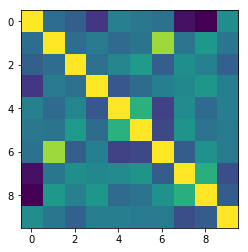

In [11]:
display(_train.corr())

plt.imshow(_train.corr())
plt.show()

In [12]:
print(_train.shape)

clf = RandomForestClassifier()
clf = clf.fit(_train, _y_train)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(_train)

print(X_new.shape)

X_new[10:]

(891, 10)
(891, 5)


array([[  11.  ,    2.  ,    4.  ,   11.  ,   16.7 ],
       [  12.  ,    2.  ,   58.  ,   12.  ,   26.55],
       [  13.  ,    1.  ,   20.  ,   13.  ,    8.05],
       ..., 
       [ 889.  ,    2.  ,    0.  ,  615.  ,   23.45],
       [ 890.  ,    1.  ,   26.  ,  680.  ,   30.  ],
       [ 891.  ,    1.  ,   32.  ,  681.  ,    7.75]])

## Widget

You can use the show_chart method to change some parameters of the chart that 
show information of a cross tab of the fields selected:
    
```python
daw.show_chart(
    field_reference='field_of_reference',
    fields_comparison=['field1']
)
```

This method will use the parameters informed and create and show a chart and 
a data table.

In [8]:
%matplotlib notebook

daw.show_chart(
    field_reference='Survived',
    fields_comparison=['Pclass']
)

## Predictions

In [9]:
from sklearn.metrics import f1_score, accuracy_score, precision_score

### Prepare data

In [10]:
train = daw.data.copy()

train.Sex.replace('Male', 1, inplace=True)
train.Sex.replace('Female', 2, inplace=True)
train.Embarked.replace('Cherbourg', 1, inplace=True)
train.Embarked.replace('Queenstown', 2, inplace=True)
train.Embarked.replace('Southampton', 3, inplace=True)
train.Pclass.replace('Upper Class', 1, inplace=True)
train.Pclass.replace('Middle Class', 2, inplace=True)
train.Pclass.replace('Lower Class', 3, inplace=True)
train.Survived.replace('Died', 0, inplace=True)
train.Survived.replace('Survived', 1, inplace=True)

y_train = train['Survived'].copy()

print('train:')
display(train.head())

print('y_train:')
display(y_train.head())

test = pd.read_csv('../data/test.csv')
y_test =  pd.read_csv('../data/genderclassmodel.csv', index_col='PassengerId')


k = [train.index.name] + train.keys().tolist()
k.pop(k.index('Survived'))

test = test[k]

test.replace('male', 1, inplace=True)
test.replace('female', 2, inplace=True)
test.replace('C', 1, inplace=True)
test.replace('Q', 2, inplace=True)
test.replace('S', 3, inplace=True)

train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

print('test:')
display(test.head())

print('y_test:')
display(y_test.head())

# assert if the order of passenger is the same in test and y_test
assert np.all(test.PassengerId == y_test.index)

train:


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,1,1,0,7.2500,3
2,1,1,2,1,0,71.2833,1
3,1,3,2,0,0,7.9250,3
4,1,1,2,1,0,53.1000,3
5,0,3,1,0,0,8.0500,3


y_train:


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

test:


,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Family
0,892,3,1,0,0,7.8292,2,0
1,893,3,2,1,0,7.0000,3,1
2,894,2,1,0,0,9.6875,2,0
3,895,3,1,0,0,8.6625,3,0
4,896,3,2,1,1,12.2875,3,2


y_test:


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [11]:
from itertools import combinations

k = list(train.keys())
k.pop(k.index('Survived')) if 'Survived' in k else None

list_features = []

for i in range(len(k)-1):
    list_features += list([list(c) for c in combinations(k, i+1)])
list(list_features)

[['Pclass'],
 ['Sex'],
 ['SibSp'],
 ['Parch'],
 ['Fare'],
 ['Embarked'],
 ['Family'],
 ['Pclass', 'Sex'],
 ['Pclass', 'SibSp'],
 ['Pclass', 'Parch'],
 ['Pclass', 'Fare'],
 ['Pclass', 'Embarked'],
 ['Pclass', 'Family'],
 ['Sex', 'SibSp'],
 ['Sex', 'Parch'],
 ['Sex', 'Fare'],
 ['Sex', 'Embarked'],
 ['Sex', 'Family'],
 ['SibSp', 'Parch'],
 ['SibSp', 'Fare'],
 ['SibSp', 'Embarked'],
 ['SibSp', 'Family'],
 ['Parch', 'Fare'],
 ['Parch', 'Embarked'],
 ['Parch', 'Family'],
 ['Fare', 'Embarked'],
 ['Fare', 'Family'],
 ['Embarked', 'Family'],
 ['Pclass', 'Sex', 'SibSp'],
 ['Pclass', 'Sex', 'Parch'],
 ['Pclass', 'Sex', 'Fare'],
 ['Pclass', 'Sex', 'Embarked'],
 ['Pclass', 'Sex', 'Family'],
 ['Pclass', 'SibSp', 'Parch'],
 ['Pclass', 'SibSp', 'Fare'],
 ['Pclass', 'SibSp', 'Embarked'],
 ['Pclass', 'SibSp', 'Family'],
 ['Pclass', 'Parch', 'Fare'],
 ['Pclass', 'Parch', 'Embarked'],
 ['Pclass', 'Parch', 'Family'],
 ['Pclass', 'Fare', 'Embarked'],
 ['Pclass', 'Fare', 'Family'],
 ['Pclass', 'Embarked', 'F

### Classification

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [13]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    # SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [14]:
predicted = test[['PassengerId']].copy()

results = []
best = {'features': None, 'score': 0}

for model in classifiers:
    model_name = type(model).__name__

    print('\n')
    print('=' * 80)
    print(model_name)
    print('=' * 80)
    
    for features in list_features:
        result = {
            'model_name': model_name,
            'features': features
        }
        
        _train = train[features].fillna(0)
        _test = test[features].fillna(0)
        
        model.fit(_train, y_train)

        predicted['Survived'] = model.predict(_test)
        result['predicted'] = predicted.copy()
        
        result['f1'] = f1_score(y_test, predicted['Survived'])
        result['precision'] = precision_score(y_test, predicted['Survived'])
        result['accuracy'] = accuracy_score(y_test, predicted['Survived'])
        
        score = (
            result['f1'] + result['precision'] + result['accuracy']
        ) / 3
        
        if score > best['score']:
            best['model_name'] = model_name
            best['score'] = score
            best['features'] = features
        
        results.append(result)

        print('\n')
        print('features:       ', result['features'])
        print('f1 score:       ', result['f1'])
        print('precision score:', result['precision'])
        print('accuracy score: ', result['accuracy'])

print('\n')
print('BEST RESULT')
print('features:', best['features'])
print('score:   ', best['score'])



KNeighborsClassifier


features:        ['Pclass']
f1 score:        0.469208211144
precision score: 0.4
accuracy score:  0.566985645933


features:        ['Sex']
f1 score:        0.0
precision score: 0.0
accuracy score:  0.662679425837


features:        ['SibSp']
f1 score:        0.0137931034483
precision score: 0.25
accuracy score:  0.657894736842


features:        ['Parch']
f1 score:        0.0277777777778
precision score: 0.666666666667
accuracy score:  0.665071770335


features:        ['Fare']
f1 score:        0.455782312925
precision score: 0.437908496732
accuracy score:  0.617224880383


features:        ['Embarked']
f1 score:        0.329218106996
precision score: 0.392156862745
accuracy score:  0.61004784689


features:        ['Family']
f1 score:        0.48951048951
precision score: 0.48275862069
accuracy score:  0.650717703349


/home/xmn/anaconda3/envs/skdata/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/xmn/anaconda3/envs/skdata/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)




features:        ['Pclass', 'Sex']
f1 score:        0.575539568345
precision score: 0.583941605839
accuracy score:  0.717703349282


features:        ['Pclass', 'SibSp']
f1 score:        0.422712933754
precision score: 0.380681818182
accuracy score:  0.562200956938


features:        ['Pclass', 'Parch']
f1 score:        0.481994459834
precision score: 0.395454545455
accuracy score:  0.552631578947


features:        ['Pclass', 'Fare']
f1 score:        0.423611111111
precision score: 0.414965986395
accuracy score:  0.602870813397


features:        ['Pclass', 'Embarked']
f1 score:        0.405498281787
precision score: 0.393333333333
accuracy score:  0.586124401914


features:        ['Pclass', 'Family']
f1 score:        0.456140350877
precision score: 0.451388888889
accuracy score:  0.629186602871


features:        ['Sex', 'SibSp']
f1 score:        0.779661016949
precision score: 0.968421052632
accuracy score:  0.875598086124


features:        ['Sex', 'Parch']
f1 score:        0.88



features:        ['Pclass', 'Sex', 'Embarked', 'Family']
f1 score:        0.894197952218
precision score: 0.861842105263
accuracy score:  0.925837320574


features:        ['Pclass', 'SibSp', 'Parch', 'Fare']
f1 score:        0.439862542955
precision score: 0.426666666667
accuracy score:  0.61004784689


features:        ['Pclass', 'SibSp', 'Parch', 'Embarked']
f1 score:        0.460992907801
precision score: 0.460992907801
accuracy score:  0.636363636364


features:        ['Pclass', 'SibSp', 'Parch', 'Family']
f1 score:        0.435114503817
precision score: 0.471074380165
accuracy score:  0.645933014354


features:        ['Pclass', 'SibSp', 'Fare', 'Embarked']
f1 score:        0.433566433566
precision score: 0.427586206897
accuracy score:  0.612440191388


features:        ['Pclass', 'SibSp', 'Fare', 'Family']
f1 score:        0.448979591837
precision score: 0.43137254902
accuracy score:  0.612440191388


features:        ['Pclass', 'SibSp', 'Embarked', 'Family']
f1 score:       


features:        ['SibSp']
f1 score:        0.0
precision score: 0.0
accuracy score:  0.662679425837


features:        ['Parch']
f1 score:        0.0
precision score: 0.0
accuracy score:  0.662679425837


features:        ['Fare']
f1 score:        0.28125
precision score: 0.529411764706
accuracy score:  0.66985645933


features:        ['Embarked']
f1 score:        0.0
precision score: 0.0
accuracy score:  0.662679425837


features:        ['Family']
f1 score:        0.0
precision score: 0.0
accuracy score:  0.662679425837


features:        ['Pclass', 'Sex']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'SibSp']
f1 score:        0.469208211144
precision score: 0.4
accuracy score:  0.566985645933


features:        ['Pclass', 'Parch']
f1 score:        0.469208211144
precision score: 0.4
accuracy score:  0.566985645933


features:        ['Pclass', 'Fare']
f1 score:        0.403162055336
precision score: 0



features:        ['Pclass', 'Sex', 'SibSp', 'Fare']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'Sex', 'SibSp', 'Embarked']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'Sex', 'SibSp', 'Family']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'Sex', 'Parch', 'Fare']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'Sex', 'Parch', 'Embarked']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'Sex', 'Parch', 'Family']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'Sex', 'Fare', 'Embarked']
f1 score:        0.962457337884



features:        ['Sex', 'Parch', 'Fare', 'Embarked', 'Family']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['SibSp', 'Parch', 'Fare', 'Embarked', 'Family']
f1 score:        0.31
precision score: 0.525423728814
accuracy score:  0.66985645933


features:        ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Family']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Family']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'Sex', 'SibSp', 'Fare', 'Embarked', 'Family']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526




features:        ['SibSp', 'Parch', 'Family']
f1 score:        0.485507246377
precision score: 0.496296296296
accuracy score:  0.66028708134


features:        ['SibSp', 'Fare', 'Embarked']
f1 score:        0.401785714286
precision score: 0.542168674699
accuracy score:  0.679425837321


features:        ['SibSp', 'Fare', 'Family']
f1 score:        0.494382022472
precision score: 0.52380952381
accuracy score:  0.677033492823


features:        ['SibSp', 'Embarked', 'Family']
f1 score:        0.369369369369
precision score: 0.506172839506
accuracy score:  0.665071770335


features:        ['Parch', 'Fare', 'Embarked']
f1 score:        0.4
precision score: 0.556962025316
accuracy score:  0.684210526316


features:        ['Parch', 'Fare', 'Family']
f1 score:        0.51320754717
precision score: 0.548387096774
accuracy score:  0.691387559809


features:        ['Parch', 'Embarked', 'Family']
f1 score:        0.41975308642
precision score: 0.5
accuracy score:  0.662679425837


features: 



features:        ['Sex', 'SibSp', 'Fare', 'Embarked', 'Family']
f1 score:        0.903448275862
precision score: 0.879194630872
accuracy score:  0.933014354067


features:        ['Sex', 'Parch', 'Fare', 'Embarked', 'Family']
f1 score:        0.900343642612
precision score: 0.873333333333
accuracy score:  0.930622009569


features:        ['SibSp', 'Parch', 'Fare', 'Embarked', 'Family']
f1 score:        0.522388059701
precision score: 0.551181102362
accuracy score:  0.693779904306


features:        ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
f1 score:        0.884892086331
precision score: 0.897810218978
accuracy score:  0.923444976077


features:        ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Family']
f1 score:        0.85401459854
precision score: 0.87969924812
accuracy score:  0.904306220096


features:        ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Family']
f1 score:        0.862745098039
precision score: 0.964912280702
accuracy score:  0.916267942584





features:        ['Sex', 'Parch', 'Family']
f1 score:        0.955017301038
precision score: 0.932432432432
accuracy score:  0.968899521531


features:        ['Sex', 'Fare', 'Embarked']
f1 score:        0.852112676056
precision score: 0.846153846154
accuracy score:  0.8995215311


features:        ['Sex', 'Fare', 'Family']
f1 score:        0.924187725632
precision score: 0.941176470588
accuracy score:  0.94976076555


features:        ['Sex', 'Embarked', 'Family']
f1 score:        0.965034965035
precision score: 0.951724137931
accuracy score:  0.976076555024


features:        ['SibSp', 'Parch', 'Fare']
f1 score:        0.482490272374
precision score: 0.534482758621
accuracy score:  0.681818181818


features:        ['SibSp', 'Parch', 'Embarked']
f1 score:        0.401639344262
precision score: 0.47572815534
accuracy score:  0.650717703349


features:        ['SibSp', 'Parch', 'Family']
f1 score:        0.485507246377
precision score: 0.496296296296
accuracy score:  0.66028708134






features:        ['Pclass', 'Sex', 'Parch', 'Embarked', 'Family']
f1 score:        0.872180451128
precision score: 0.928
accuracy score:  0.918660287081


features:        ['Pclass', 'Sex', 'Fare', 'Embarked', 'Family']
f1 score:        0.820895522388
precision score: 0.866141732283
accuracy score:  0.885167464115


features:        ['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']
f1 score:        0.490706319703
precision score: 0.515625
accuracy score:  0.672248803828


features:        ['Pclass', 'SibSp', 'Parch', 'Fare', 'Family']
f1 score:        0.542124542125
precision score: 0.560606060606
accuracy score:  0.700956937799


features:        ['Pclass', 'SibSp', 'Parch', 'Embarked', 'Family']
f1 score:        0.486486486486
precision score: 0.533898305085
accuracy score:  0.681818181818


features:        ['Pclass', 'SibSp', 'Fare', 'Embarked', 'Family']
f1 score:        0.505660377358
precision score: 0.540322580645
accuracy score:  0.686602870813


features:        ['Pclass', '

/home/xmn/anaconda3/envs/skdata/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/xmn/anaconda3/envs/skdata/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)




features:        ['SibSp']
f1 score:        0.0
precision score: 0.0
accuracy score:  0.662679425837


features:        ['Parch']
f1 score:        0.0
precision score: 0.0
accuracy score:  0.662679425837


features:        ['Fare']
f1 score:        0.345794392523
precision score: 0.506849315068
accuracy score:  0.665071770335


features:        ['Embarked']
f1 score:        0.329218106996
precision score: 0.392156862745
accuracy score:  0.61004784689


features:        ['Family']
f1 score:        0.463235294118
precision score: 0.480916030534
accuracy score:  0.650717703349


features:        ['Pclass', 'Sex']
f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'SibSp']
f1 score:        0.396761133603
precision score: 0.462264150943
accuracy score:  0.643540669856


features:        ['Pclass', 'Parch']
f1 score:        0.449612403101
precision score: 0.495726495726
accuracy score:  0.66028708134


features:    



features:        ['Fare', 'Embarked', 'Family']
f1 score:        0.409266409266
precision score: 0.449152542373
accuracy score:  0.633971291866


features:        ['Pclass', 'Sex', 'SibSp', 'Parch']
f1 score:        0.968858131488
precision score: 0.945945945946
accuracy score:  0.978468899522


features:        ['Pclass', 'Sex', 'SibSp', 'Fare']
f1 score:        0.59793814433
precision score: 0.58
accuracy score:  0.72009569378


features:        ['Pclass', 'Sex', 'SibSp', 'Embarked']
f1 score:        0.880503144654
precision score: 0.790960451977
accuracy score:  0.909090909091


features:        ['Pclass', 'Sex', 'SibSp', 'Family']
f1 score:        0.962199312715
precision score: 0.933333333333
accuracy score:  0.973684210526


features:        ['Pclass', 'Sex', 'Parch', 'Fare']
f1 score:        0.571428571429
precision score: 0.561643835616
accuracy score:  0.705741626794


features:        ['Pclass', 'Sex', 'Parch', 'Embarked']
f1 score:        0.886731391586
precision score: 0.



features:        ['Sex', 'SibSp', 'Fare', 'Embarked', 'Family']
f1 score:        0.865051903114
precision score: 0.844594594595
accuracy score:  0.906698564593


features:        ['Sex', 'Parch', 'Fare', 'Embarked', 'Family']
f1 score:        0.787096774194
precision score: 0.721893491124
accuracy score:  0.842105263158


features:        ['SibSp', 'Parch', 'Fare', 'Embarked', 'Family']
f1 score:        0.436507936508
precision score: 0.495495495495
accuracy score:  0.66028708134


features:        ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
f1 score:        0.814569536424
precision score: 0.76397515528
accuracy score:  0.866028708134


features:        ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Family']
f1 score:        0.660066006601
precision score: 0.617283950617
accuracy score:  0.753588516746


features:        ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Family']
f1 score:        0.880503144654
precision score: 0.790960451977
accuracy score:  0.909090909091





features:        ['Sex', 'Parch', 'Fare']
f1 score:        0.911475409836
precision score: 0.84756097561
accuracy score:  0.935406698565


features:        ['Sex', 'Parch', 'Embarked']
f1 score:        0.965517241379
precision score: 0.939597315436
accuracy score:  0.976076555024


features:        ['Sex', 'Parch', 'Family']
f1 score:        0.968641114983
precision score: 0.952054794521
accuracy score:  0.978468899522


features:        ['Sex', 'Fare', 'Embarked']
f1 score:        0.890365448505
precision score: 0.8375
accuracy score:  0.921052631579


features:        ['Sex', 'Fare', 'Family']
f1 score:        0.920529801325
precision score: 0.863354037267
accuracy score:  0.942583732057


features:        ['Sex', 'Embarked', 'Family']
f1 score:        0.965034965035
precision score: 0.951724137931
accuracy score:  0.976076555024


features:        ['SibSp', 'Parch', 'Fare']
f1 score:        0.503937007874
precision score: 0.566371681416
accuracy score:  0.698564593301


features: 



features:        ['Pclass', 'Sex', 'SibSp', 'Embarked', 'Family']
f1 score:        0.939189189189
precision score: 0.896774193548
accuracy score:  0.956937799043


features:        ['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked']
f1 score:        0.9
precision score: 0.849056603774
accuracy score:  0.928229665072


features:        ['Pclass', 'Sex', 'Parch', 'Fare', 'Family']
f1 score:        0.920529801325
precision score: 0.863354037267
accuracy score:  0.942583732057


features:        ['Pclass', 'Sex', 'Parch', 'Embarked', 'Family']
f1 score:        0.939189189189
precision score: 0.896774193548
accuracy score:  0.956937799043


features:        ['Pclass', 'Sex', 'Fare', 'Embarked', 'Family']
f1 score:        0.928813559322
precision score: 0.88961038961
accuracy score:  0.94976076555


features:        ['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']
f1 score:        0.478764478764
precision score: 0.525423728814
accuracy score:  0.677033492823


features:        ['Pclass', 'SibSp

/home/xmn/anaconda3/envs/skdata/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/xmn/anaconda3/envs/skdata/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


precision score: 0.390625
accuracy score:  0.562200956938


features:        ['Pclass', 'Parch']
f1 score:        0.403225806452
precision score: 0.467289719626
accuracy score:  0.645933014354


features:        ['Pclass', 'Fare']
f1 score:        0.4
precision score: 0.45871559633
accuracy score:  0.641148325359


features:        ['Pclass', 'Embarked']
f1 score:        0.421768707483
precision score: 0.40522875817
accuracy score:  0.593301435407


features:        ['Pclass', 'Family']
f1 score:        0.413793103448
precision score: 0.45
accuracy score:  0.633971291866


features:        ['Sex', 'SibSp']
f1 score:        0.961937716263
precision score: 0.939189189189
accuracy score:  0.973684210526


features:        ['Sex', 'Parch']
f1 score:        0.965753424658
precision score: 0.933774834437
accuracy score:  0.976076555024


features:        ['Sex', 'Fare']
f1 score:        0.924590163934
precision score: 0.859756097561
accuracy score:  0.944976076555


features:        ['Sex', 

precision score: 0.754010695187
accuracy score:  0.88995215311


features:        ['Pclass', 'Sex', 'Fare', 'Family']
f1 score:        0.903225806452
precision score: 0.828402366864
accuracy score:  0.928229665072


features:        ['Pclass', 'Sex', 'Embarked', 'Family']
f1 score:        0.891719745223
precision score: 0.809248554913
accuracy score:  0.918660287081


features:        ['Pclass', 'SibSp', 'Parch', 'Fare']
f1 score:        0.390438247012
precision score: 0.445454545455
accuracy score:  0.633971291866


features:        ['Pclass', 'SibSp', 'Parch', 'Embarked']
f1 score:        0.402730375427
precision score: 0.388157894737
accuracy score:  0.581339712919


features:        ['Pclass', 'SibSp', 'Parch', 'Family']
f1 score:        0.434250764526
precision score: 0.381720430108
accuracy score:  0.557416267943


features:        ['Pclass', 'SibSp', 'Fare', 'Embarked']
f1 score:        0.401544401544
precision score: 0.440677966102
accuracy score:  0.629186602871


features:   

f1 score:        0.962457337884
precision score: 0.927631578947
accuracy score:  0.973684210526


features:        ['Pclass', 'SibSp']
f1 score:        0.458333333333
precision score: 0.394871794872
accuracy score:  0.564593301435


features:        ['Pclass', 'Parch']
f1 score:        0.403225806452
precision score: 0.467289719626
accuracy score:  0.645933014354


features:        ['Pclass', 'Fare']
f1 score:        0.384615384615
precision score: 0.483870967742
accuracy score:  0.655502392344


features:        ['Pclass', 'Embarked']
f1 score:        0.421768707483
precision score: 0.40522875817
accuracy score:  0.593301435407


features:        ['Pclass', 'Family']
f1 score:        0.413793103448
precision score: 0.45
accuracy score:  0.633971291866


features:        ['Sex', 'SibSp']
f1 score:        0.961937716263
precision score: 0.939189189189
accuracy score:  0.973684210526


features:        ['Sex', 'Parch']
f1 score:        0.955017301038
precision score: 0.932432432432
accur

/home/xmn/anaconda3/envs/skdata/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")




features:        ['Pclass', 'Sex', 'SibSp', 'Fare']
f1 score:        0.917491749175
precision score: 0.858024691358
accuracy score:  0.94019138756


features:        ['Pclass', 'Sex', 'SibSp', 'Embarked']
f1 score:        0.87898089172
precision score: 0.797687861272
accuracy score:  0.909090909091


features:        ['Pclass', 'Sex', 'SibSp', 'Family']
f1 score:        0.939189189189
precision score: 0.896774193548
accuracy score:  0.956937799043


features:        ['Pclass', 'Sex', 'Parch', 'Fare']
f1 score:        0.898954703833
precision score: 0.883561643836
accuracy score:  0.930622009569


features:        ['Pclass', 'Sex', 'Parch', 'Embarked']
f1 score:        0.881028938907
precision score: 0.805882352941
accuracy score:  0.911483253589


features:        ['Pclass', 'Sex', 'Parch', 'Family']
f1 score:        0.939189189189
precision score: 0.896774193548
accuracy score:  0.956937799043


features:        ['Pclass', 'Sex', 'Fare', 'Embarked']
f1 score:        0.88256227758
pr



features:        ['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked', 'Family']
f1 score:        0.893203883495
precision score: 0.821428571429
accuracy score:  0.921052631579


features:        ['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family']
f1 score:        0.0701754385965
precision score: 0.2
accuracy score:  0.61961722488


features:        ['Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family']
f1 score:        0.19512195122
precision score: 0.695652173913
accuracy score:  0.684210526316


BEST RESULT
features: ['Pclass', 'Sex', 'Parch']
score:    0.9726230004


In [15]:
best_result = [
    r for r in results if
    r['features'] == best['features'] and
    r['model_name'] == best['model_name']
][0]

best_result['predicted'].to_csv(
    '/tmp/titanic-%s.csv' % best_result['model_name'], 
    index=False
)

best_result

{'accuracy': 0.97846889952153115,
 'f1': 0.9679715302491102,
 'features': ['Pclass', 'Sex', 'Parch'],
 'model_name': 'MLPClassifier',
 'precision': 0.97142857142857142,
 'predicted':      PassengerId  Survived
 0            892         0
 1            893         1
 2            894         0
 3            895         0
 4            896         1
 5            897         0
 6            898         1
 7            899         0
 8            900         1
 9            901         0
 10           902         0
 11           903         0
 12           904         1
 13           905         0
 14           906         1
 15           907         1
 16           908         0
 17           909         0
 18           910         1
 19           911         1
 20           912         0
 21           913         0
 22           914         1
 23           915         0
 24           916         1
 25           917         0
 26           918         1
 27           919         0
 28   

### Regression

## Conclusion

These are an initial functionalities to help handle and observe data phenomenons
in a very quick way.